In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#residual normality check
from scipy.stats import shapiro
import statsmodels.api as sm

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

<AxesSubplot:ylabel='Density'>

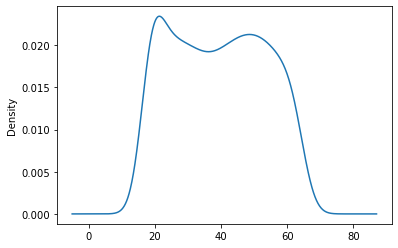

In [6]:
df["age"].plot(kind="kde")

In [7]:
df["age"].skew()

0.05567251565299186

<AxesSubplot:>

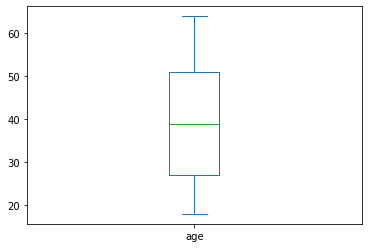

In [8]:
df["age"].plot(kind="box")

In [9]:
# bmi

In [10]:
df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<AxesSubplot:ylabel='Density'>

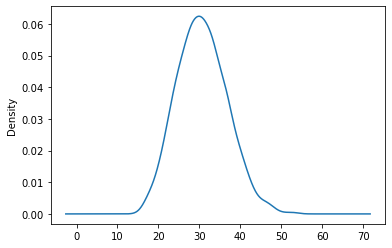

In [11]:
df["bmi"].plot(kind="kde")

<AxesSubplot:ylabel='Frequency'>

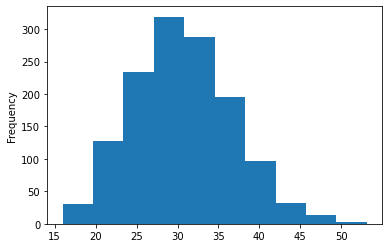

In [12]:
df["bmi"].plot(kind="hist")

<AxesSubplot:>

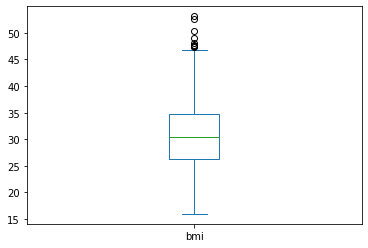

In [13]:
df["bmi"].plot(kind="box")

In [14]:
df["bmi"].skew()

0.2840471105987448

In [15]:

from scipy.stats import zscore
z_score_val = np.abs(zscore(df["bmi"]))

outlier_index = np.where(z_score_val >=3)[0]

outlier_val = df["bmi"][outlier_index]
outlier_val

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

In [16]:
mean=df["bmi"].mean()
std=df["bmi"].std()
minn=df["bmi"].min()
maxx=df["bmi"].max()

In [17]:
upper=mean+3*std
lower=mean-3*std
print(upper)
print(lower)

48.95795759602359
12.368836125949485


In [18]:
df["bmi"]=np.where(df["bmi"]>=upper,upper,
                  np.where(df["bmi"]<=lower,lower,
                          df["bmi"]))

<AxesSubplot:>

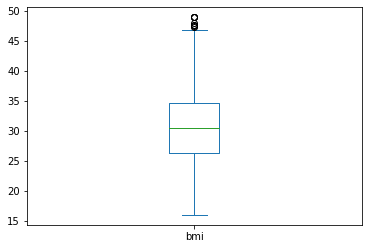

In [19]:
df["bmi"].plot(kind="box")

In [20]:
df["bmi"].skew()

0.2530871469583149

In [21]:
df["bmi"]=df["bmi"].astype(float)

In [22]:
from scipy.stats import boxcox

bmi = boxcox(df['bmi'])[0]
bmi=pd.DataFrame(bmi)
df["bmi"]=bmi
df["bmi"]

0       8.448702
1       9.483880
2       9.353595
3       7.435867
4       8.628709
          ...   
1333    9.002542
1334    9.168234
1335    9.990549
1336    8.051862
1337    8.663248
Name: bmi, Length: 1338, dtype: float64

In [23]:
bmilog=np.log1p(df["bmi"])

In [24]:
bmilog.skew()

-0.2980065576945348

<AxesSubplot:xlabel='bmi', ylabel='Density'>

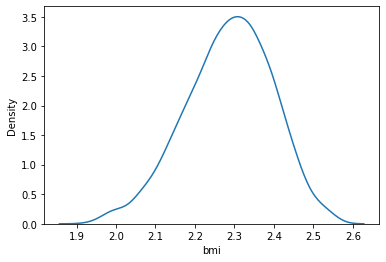

In [25]:
sns.kdeplot(bmilog)

<AxesSubplot:ylabel='Density'>

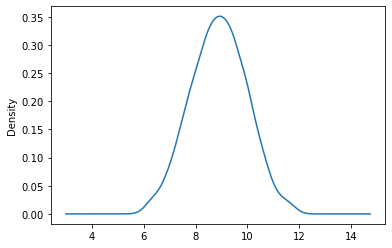

In [26]:
df["bmi"].plot(kind="kde")

In [27]:
## IQR Method 

In [28]:
Q1=df["bmi"].quantile(.25)
Q3=df["bmi"].quantile(.75)
IQR=Q3-Q1

In [29]:
Up=Q3+1.55*(IQR)
Lw=Q1-1.55*(IQR)

In [30]:
print(Up)
print(Lw)

11.949476284013103
5.835807426739462


In [31]:
48.95795759602359
12.36883612594948

12.36883612594948

In [32]:
df["bmi"].loc[(df["bmi"]>Up)| (df["bmi"]<Lw)]

Series([], Name: bmi, dtype: float64)

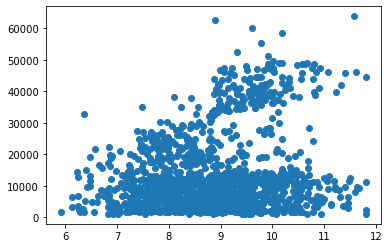

In [33]:
plt.scatter(df["bmi"],df["charges"])

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,8.448702,0,yes,southwest,16884.92400
1,18,male,9.483880,1,no,southeast,1725.55230
2,28,male,9.353595,3,no,southeast,4449.46200
3,33,male,7.435867,0,no,northwest,21984.47061
4,32,male,8.628709,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,9.002542,3,no,northwest,10600.54830
1334,18,female,9.168234,0,no,northeast,2205.98080
1335,18,female,9.990549,0,no,southeast,1629.83350
1336,21,female,8.051862,0,no,southwest,2007.94500


In [35]:
## children

In [36]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

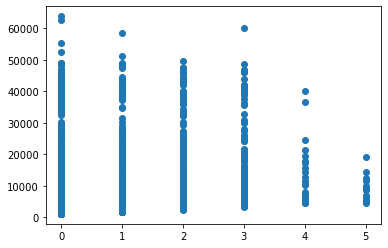

In [37]:
plt.scatter(df["children"],df["charges"])

<AxesSubplot:>

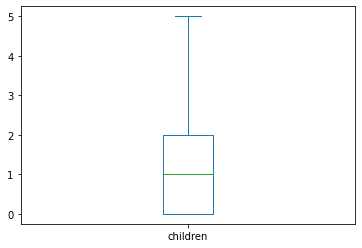

In [38]:
df["children"].plot(kind="box")

In [39]:
df["children"].skew()

0.9383804401702414

<AxesSubplot:ylabel='Density'>

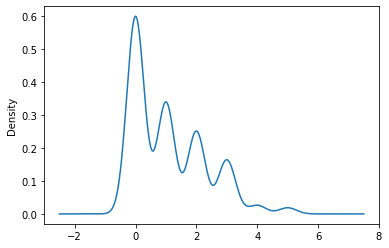

In [40]:
df["children"].plot(kind="kde")

In [41]:
from scipy.stats import yeojohnson

child = yeojohnson(df['children'])[0]
child=pd.DataFrame(child)
df["children"]=child
df["children"]

0      -0.000000
1       0.612155
2       1.087056
3      -0.000000
4      -0.000000
          ...   
1333    1.087056
1334   -0.000000
1335   -0.000000
1336   -0.000000
1337   -0.000000
Name: children, Length: 1338, dtype: float64

In [42]:
child.skew()

0    0.105254
dtype: float64

<AxesSubplot:ylabel='Density'>

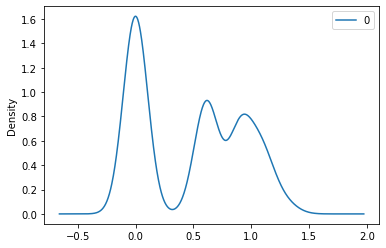

In [43]:
child.plot(kind="kde")

<AxesSubplot:>

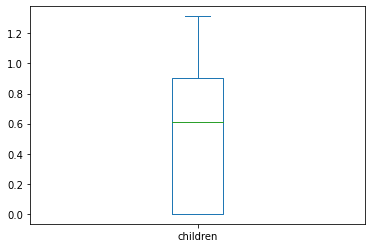

In [44]:
df["children"].plot(kind="box")

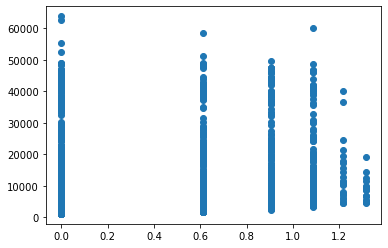

In [45]:
plt.scatter(df["children"],df["charges"])

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,8.448702,-0.000000,yes,southwest,16884.92400
1,18,male,9.483880,0.612155,no,southeast,1725.55230
2,28,male,9.353595,1.087056,no,southeast,4449.46200
3,33,male,7.435867,-0.000000,no,northwest,21984.47061
4,32,male,8.628709,-0.000000,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,9.002542,1.087056,no,northwest,10600.54830
1334,18,female,9.168234,-0.000000,no,northeast,2205.98080
1335,18,female,9.990549,-0.000000,no,southeast,1629.83350
1336,21,female,8.051862,-0.000000,no,southwest,2007.94500


In [47]:
## Target column 

In [48]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:ylabel='Density'>

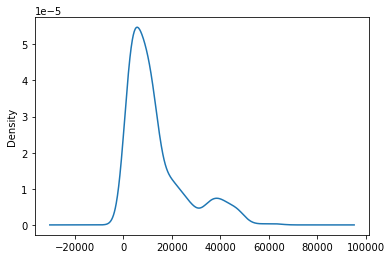

In [49]:
df["charges"].plot(kind="kde")

In [50]:
df["charges"].skew()

1.5158796580240388

In [51]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,8.448702,-0.000000,yes,southwest,16884.92400
1,18,male,9.483880,0.612155,no,southeast,1725.55230
2,28,male,9.353595,1.087056,no,southeast,4449.46200
3,33,male,7.435867,-0.000000,no,northwest,21984.47061
4,32,male,8.628709,-0.000000,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,9.002542,1.087056,no,northwest,10600.54830
1334,18,female,9.168234,-0.000000,no,northeast,2205.98080
1335,18,female,9.990549,-0.000000,no,southeast,1629.83350
1336,21,female,8.051862,-0.000000,no,southwest,2007.94500


In [52]:
df=pd.get_dummies(df,columns=["sex","smoker"],drop_first=True)

In [53]:
df=pd.get_dummies(df,columns=["region"])

In [54]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,8.448702,-0.000000,16884.92400,0,1,0,0,0,1
1,18,9.483880,0.612155,1725.55230,1,0,0,0,1,0
2,28,9.353595,1.087056,4449.46200,1,0,0,0,1,0
3,33,7.435867,-0.000000,21984.47061,1,0,0,1,0,0
4,32,8.628709,-0.000000,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,9.002542,1.087056,10600.54830,1,0,0,1,0,0
1334,18,9.168234,-0.000000,2205.98080,0,0,1,0,0,0
1335,18,9.990549,-0.000000,1629.83350,0,0,0,0,1,0
1336,21,8.051862,-0.000000,2007.94500,0,0,0,0,0,1


In [55]:
df.rename({"sex_male":"sex","smoker_yes":"smoker"},axis=1,inplace=True)

In [56]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

In [57]:
x

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,8.448702,-0.000000,0,1,0,0,0,1
1,18,9.483880,0.612155,1,0,0,0,1,0
2,28,9.353595,1.087056,1,0,0,0,1,0
3,33,7.435867,-0.000000,1,0,0,1,0,0
4,32,8.628709,-0.000000,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,9.002542,1.087056,1,0,0,1,0,0
1334,18,9.168234,-0.000000,0,0,1,0,0,0
1335,18,9.990549,-0.000000,0,0,0,0,1,0
1336,21,8.051862,-0.000000,0,0,0,0,0,1


<AxesSubplot:>

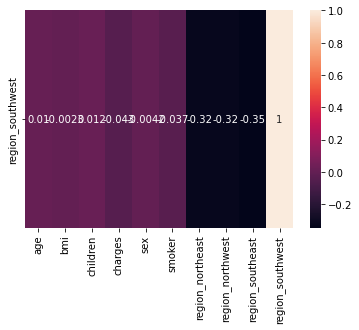

In [58]:

sns.heatmap(df.corr().tail(1),annot=True)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=12)

In [60]:
x_train

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
161,18,9.990549,-0.000000,0,1,0,0,1,0
1032,30,8.454260,-0.000000,0,0,1,0,0,0
151,48,8.776963,-0.000000,1,0,0,0,1,0
759,18,10.201104,-0.000000,1,1,0,0,1,0
362,19,7.226788,-0.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
278,59,9.145709,0.904466,1,0,0,0,1,0
432,42,8.261690,-0.000000,1,0,0,0,0,1
1283,18,8.836040,0.612155,1,0,0,0,1,0
1265,64,7.650365,-0.000000,1,1,0,0,1,0


In [61]:
lr=LinearRegression()

In [62]:
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred=(lr.predict(x_test))
y_pred[:10]

array([10232.77725666,  5953.83241124, 30397.3008357 ,  5977.13661801,
        1512.11100831,  1699.55445091,  2578.73131417, 17268.32414406,
        9311.12538561, 33201.93945994])

In [64]:
(y_test[:10])

936     32108.66282
728      2217.60120
1307    21472.47880
924      6250.43500
137      2045.68525
404      3260.19900
1194     4134.08245
170     13405.39030
1169     6112.35295
577     58571.07448
Name: charges, dtype: float64

In [65]:
# Training dataset

y_pred_train = lr.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35168044.824522145
RMSE : 5930.265156341843
MAE : 4182.354418171383
R Squared : 0.7610336160916515


In [66]:
# Testing Dataset

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 41688561.563267134
RMSE : 6456.667992336847
MAE : 4375.0099702423
R Squared : 0.7105190593979596


In [67]:
x_train

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
161,18,9.990549,-0.000000,0,1,0,0,1,0
1032,30,8.454260,-0.000000,0,0,1,0,0,0
151,48,8.776963,-0.000000,1,0,0,0,1,0
759,18,10.201104,-0.000000,1,1,0,0,1,0
362,19,7.226788,-0.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
278,59,9.145709,0.904466,1,0,0,0,1,0
432,42,8.261690,-0.000000,1,0,0,0,0,1
1283,18,8.836040,0.612155,1,0,0,0,1,0
1265,64,7.650365,-0.000000,1,1,0,0,1,0


In [68]:
column_names = x.columns
len(column_names)        # No of input columns

9

In [69]:
column_names

Index(['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [70]:
x.head(1).T ## Lets make prediction for first training data

,0
age,19.000000
bmi,8.448702
children,-0.000000
sex,0.000000
smoker,1.000000
region_northeast,0.000000
region_northwest,0.000000
region_southeast,0.000000
region_southwest,1.000000


In [71]:
sex_values={'female': 0, 'male': 1}
smoker_values={'yes': 1, 'no': 0}

In [72]:
# As originally features we have  lets take example what user will provide inputs

age = 40
sex = "male"
bmi = 22.5
children = 4
smoker = "no"
region = "northeast"

# charges = ?

In [73]:
print(sex_values)
print(smoker_values)
print(column_names)

{'female': 0, 'male': 1}
{'yes': 1, 'no': 0}
Index(['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [74]:
project_data = {"sex":sex_values, "smoker":smoker_values, "columns":list(column_names)}
(project_data)

{'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'bmi',
  'children',
  'sex',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [75]:
json_data={'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'bmi',
  'children',
  'sex',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}
len(json_data["columns"])

9

In [76]:
(json_data["columns"])

['age',
 'bmi',
 'children',
 'sex',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [77]:
project_data['sex'][sex]

1

In [80]:

region="region_"+ region
region

'region_northeast'

In [81]:
region_index = np.where(column_names == region)[0][0]
region_index

5

In [82]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
array = np.zeros(x.shape[1])
array[0] = age
array[1] = project_data['sex'][sex]
array[2] = bmi
array[3] = children
array[4] = project_data['smoker'][smoker]
array[region_index] = 1

print(array)

[40.   1.  22.5  4.   0.   1.   0.   0.   0. ]


In [84]:
lr.predict([array])[0]

17385.04603497827

In [85]:
import pickle

with open("Insurance_Linear_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [86]:
import json

with open("insurance_project_data.json", "w") as f:
    json.dump(project_data, f)